<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T11%20-%202%20-%20Señales%20de%20tráfico-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17706, done.
remote: Total 17706 (delta 0), reused 0 (delta 0), pack-reused 17706
Receiving objects: 100% (17706/17706), 523.15 MiB | 7.97 MiB/s, done.
Resolving deltas: 100% (333/333), done.
Updating files: 100% (16940/16940), done.


# Damos acceso a nuestro Drive

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
# Test it
#!ls '/content/drive/My Drive' 

In [5]:
#from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
#import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
#from google.colab import drive # Montar tu Google drive

In [6]:
#%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


# Reconocimiento de las señales de tráfico

In [ ]:
import tensorflow as tf
print(tf.__version__)
import os
import skimage.io as imd
import numpy as np

In [ ]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [ ]:
main_dir = "/content/python-ml-course/datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [ ]:
images, labels = load_ml_data(train_data_dir)

In [ ]:
images = np.array(images)

In [ ]:
labels = np.array(labels)

In [ ]:
images.ndim

In [ ]:
images.size

In [ ]:
images[0]

In [ ]:
labels.ndim

In [ ]:
labels.size

In [ ]:
len(set(labels))

In [ ]:
images.flags

In [ ]:
images.itemsize

In [ ]:
images.nbytes

In [ ]:
images.nbytes/images.itemsize

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(labels, len(set(labels)))
plt.show()

In [ ]:
import random

In [ ]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

In [ ]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [ ]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [ ]:
type(labels)

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [ ]:
from skimage import transform

In [ ]:
w = 9999 
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

In [ ]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [ ]:
images30[0]

In [ ]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [ ]:
from skimage.color import rgb2gray

In [ ]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

In [ ]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [ ]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [ ]:
images_flat

In [ ]:
logits

In [ ]:
loss

In [ ]:
final_pred

In [32]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
    #print("Fin del Ecpoh ", i)

EPOCH 0
Eficacia:  37.650494
EPOCH 50
Eficacia:  35.907978
EPOCH 100
Eficacia:  35.659233
EPOCH 150
Eficacia:  35.29814
EPOCH 200
Eficacia:  35.14011
EPOCH 250
Eficacia:  35.06142
EPOCH 300
Eficacia:  34.930275
EPOCH 350
Eficacia:  34.835846
EPOCH 400
Eficacia:  34.6988
EPOCH 450
Eficacia:  34.59825
EPOCH 500
Eficacia:  34.495518
EPOCH 550
Eficacia:  34.460327
EPOCH 600
Eficacia:  34.397377


# Evaluación de la red neuronal

In [41]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [42]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [43]:
prediction

array([37, 22, 22,  0, 32, 56, 47, 35, 40, 22, 38, 38,  1, 34, 56, 32, 32,
        7, 28, 61, 38, 39, 61, 37, 47, 61, 32, 38, 32, 41, 32, 39, 32, 31,
       47, 28, 40, 47, 57, 54])

In [44]:
sample_labels

[37,
 22,
 22,
 19,
 32,
 56,
 47,
 35,
 40,
 22,
 38,
 38,
 4,
 34,
 56,
 9,
 32,
 7,
 28,
 61,
 38,
 44,
 61,
 37,
 47,
 61,
 32,
 38,
 45,
 41,
 32,
 39,
 32,
 31,
 47,
 19,
 40,
 47,
 57,
 53]

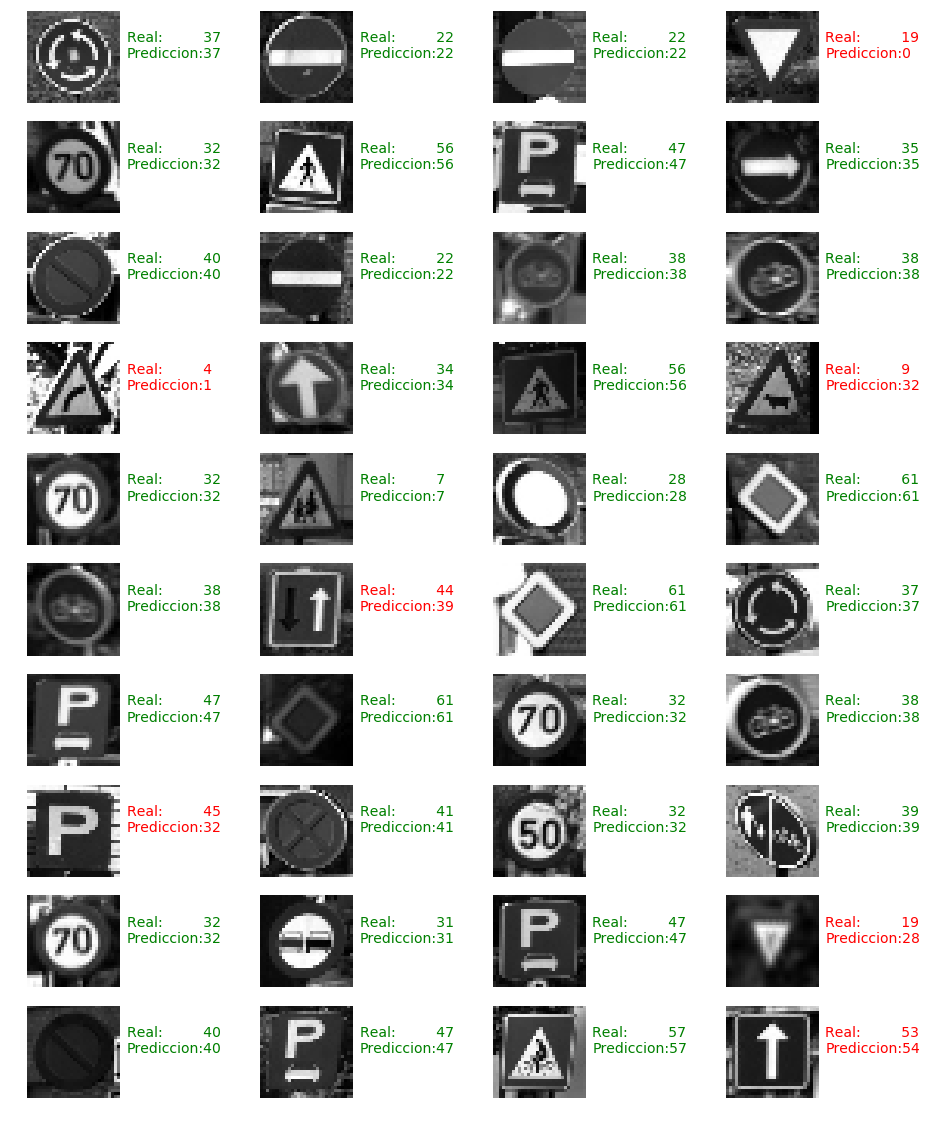

In [45]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [46]:
test_images, test_labels = load_ml_data(test_data_dir)

In [47]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [48]:
test_images30 = rgb2gray(np.array(test_images30))

In [49]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [50]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1603

In [51]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 63.61
